# 2 - Testing Crystal Overlaps

This notebook creates a bulk of the simulated data for the Toy model section of the paper.

Here we test overlaps in Diffraction Vectors with increasing overlaps

Carter Francis | csfrancis@wisc.edu | 2024-01-15

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from orix.crystal_map import Phase
from orix.quaternion import Rotation
import hyperspy.api as hs

In [2]:
from scipy.spatial.transform import Rotation as R

In [3]:
from utils import *
import matplotlib.pyplot as plt
from skimage.morphology import disk as d2
from skimage.feature import peak_local_max
from scipy.ndimage import correlate
from skimage.util import view_as_windows

## 2.0 Nanocrystals with Increasing Overlaps

This function creates the recall numbers etc. for recalling the specific diffraction vectors.  Note that this function isn't exactly __fast__.  There is probably a factor of like 2-10 improvement in speed that is possible but I honestly didn't really spend too much time thinking about making it faster.

In this function we vary the number of crystals in the field of view and try to recall the nano-crystals. We have defined two metrics:

1. Complete diffraction pattern recall -> All of the diffraction vectors for some crystal are properly identified and clustered
2. Partial Diffraction Pattern Recell --> 2 or more of the diffraction vectors for some crystal are properly identified (But not all of them.

In [7]:
from pyxem.signals.diffraction_vectors import DiffractionVectors
from dask_image.ndfilters import gaussian_filter
from sklearn.cluster import DBSCAN
from scipy.spatial import KDTree

/Users/carterfrancis/mambaforge/envs/pyxem-dev/lib/python3.11/site-packages/diffsims/generators/sphere_mesh_generators.py:523: RuntimeWarning: invalid value encountered in divide
  phi2 = sign * np.nan_to_num(np.arccos(x_comp / norm_proj))


WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 41.23 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 211.00 ms
18 : Clusters Found!
[0.5 1.  nan] [ 2 13  2]
Perfect Recall 0.7647058823529411
Partial Recall 0.8823529411764706
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 43.23 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 312.13 ms
36 : Clusters Found!
[0.5        0.71428571 1.                nan] [ 6  1 16  4]
Perfect Recall 0.5925925925925926
Partial Recall 0.8518518518518519
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 44.80 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 418.82 ms
44 : Clusters Found!
[0.         0.33333333 0.5        0.66666667 0.8        1.
        nan] [ 1  1 10  1  1 19  3]
Perfect Recall 0.5277777777777778
Partial Recall 0.8888888888888888
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 48.37 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 632.37 ms
83 : Clusters Found!
[0.5        0.71428571 1.         1.5               nan] [15  1 37  1  9]
Perfect Recall 0.6031746031746031
Partial Recall 0.8571428571428571
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 50.68 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.06 ss
131 : Clusters Found!
[0.         0.25       0.4        0.5        0.55555556 0.6
 0.71428571 0.75       0.77777778 1.         1.25              nan] [ 2  1  1 26  1  1  1  3  1 54  1 20]
Perfect Recall 0.49107142857142855
Partial Recall 0.8035714285714286
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 54.99 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.72 ss
199 : Clusters Found!
[0.         0.25       0.5        0.6        0.66666667 0.75
 0.77777778 1.         1.5        2.                nan] [ 9  5 35  1  2  5  1 71  3  1 54]
Perfect Recall 0.40106951871657753
Partial Recall 0.6631016042780749
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 58.98 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 2.27 ss
221 : Clusters Found!
[0.         0.2        0.25       0.33333333 0.5        0.58333333
 0.6        0.625      0.66666667 0.75       1.         1.33333333
 1.5        1.66666667 2.         2.5        4.                nan] [ 17   1   3   3  42   1   1   1   3   2  64   1   4   1   1   1   1 216]
Perfect Recall 0.20110192837465565
Partial Recall 0.3581267217630854


/Users/carterfrancis/mambaforge/envs/pyxem-dev/lib/python3.11/site-packages/diffsims/generators/sphere_mesh_generators.py:523: RuntimeWarning: invalid value encountered in divide
  phi2 = sign * np.nan_to_num(np.arccos(x_comp / norm_proj))


WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 39.43 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 105.64 ms
13 : Clusters Found!
[0.5  0.75 1.  ] [2 1 8]
Perfect Recall 0.7272727272727273
Partial Recall 1.0
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 42.39 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 314.60 ms
32 : Clusters Found!
[0.5        0.57142857 0.71428571 0.75       1.                nan] [ 6  1  1  1 17  2]
Perfect Recall 0.6071428571428571
Partial Recall 0.9285714285714286
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 44.46 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 421.50 ms
43 : Clusters Found!
[0.5        0.63636364 0.66666667 0.75       0.8        1.
        nan] [ 7  1  1  1  1 15  8]
Perfect Recall 0.4411764705882353
Partial Recall 0.7647058823529411
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 47.04 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 747.59 ms
83 : Clusters Found!
[0.         0.5        0.66666667 0.71428571 0.75       1.
        nan] [ 3 18  2  2  1 35 15]
Perfect Recall 0.4605263157894737
Partial Recall 0.7631578947368421
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 51.78 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.22 ss
123 : Clusters Found!
[0.         0.33333333 0.5        0.6        0.66666667 0.75
 0.77777778 1.         3.                nan] [ 8  2 26  1  1  2  1 55  1 31]
Perfect Recall 0.4375
Partial Recall 0.6953125
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 52.08 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.54 ss
184 : Clusters Found!
[0.         0.25       0.33333333 0.44444444 0.5        0.6
 0.625      0.66666667 0.7        0.75       0.83333333 1.
 1.5               nan] [ 6  4  1  1 27  2  1  3  1  3  1 69  4 68]
Perfect Recall 0.38219895287958117
Partial Recall 0.612565445026178
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 57.95 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 2.31 ss
247 : Clusters Found!
[0.         0.125      0.25       0.33333333 0.4        0.5
 0.625      0.66666667 0.75       0.77777778 0.8        0.83333333
 1.         1.33333333 1.5        2.         2.5        3.
        nan] [ 18   1  10   2   1  48   1   1   1   1   1   1  73   2   3   3   1   1
 232]
Perfect Recall 0.20698254364089774
Partial Recall 0.3765586034912718


/Users/carterfrancis/mambaforge/envs/pyxem-dev/lib/python3.11/site-packages/diffsims/generators/sphere_mesh_generators.py:523: RuntimeWarning: invalid value encountered in divide
  phi2 = sign * np.nan_to_num(np.arccos(x_comp / norm_proj))


WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 43.12 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 220.95 ms
17 : Clusters Found!
[0.  0.5 1.  nan] [1 4 6 2]
Perfect Recall 0.46153846153846156
Partial Recall 0.7692307692307693
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 42.79 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 334.52 ms
27 : Clusters Found!
[0.         0.5        0.6        0.66666667 1.                nan] [ 1  3  1  1 17  4]
Perfect Recall 0.6296296296296297
Partial Recall 0.8148148148148148
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 43.98 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 441.51 ms
55 : Clusters Found!
[0.5        0.66666667 0.71428571 0.75       1.                nan] [15  1  1  2 25  2]
Perfect Recall 0.5434782608695652
Partial Recall 0.9565217391304348
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 45.51 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 766.88 ms
78 : Clusters Found!
[0.         0.25       0.5        0.58333333 0.66666667 0.7
 0.75       0.77777778 0.83333333 1.                nan] [ 1  1 12  1  2  1  3  1  1 30  7]
Perfect Recall 0.5
Partial Recall 0.8666666666666667
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 51.12 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.32 ss
140 : Clusters Found!
[0.         0.44444444 0.5        0.58333333 0.6        0.71428571
 0.75       0.77777778 0.8        0.85714286 1.         1.5
        nan] [ 7  1 25  1  1  1  2  1  1  1 52  2 39]
Perfect Recall 0.40298507462686567
Partial Recall 0.6567164179104478
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 54.00 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.62 ss
183 : Clusters Found!
[0.         0.2        0.25       0.28571429 0.44444444 0.5
 0.58333333 0.63636364 0.66666667 0.75       0.88888889 0.91666667
 1.         1.25       2.                nan] [ 7  1  2  1  1 32  1  1  4  4  1  1 61  1  1 60]
Perfect Recall 0.35195530726256985
Partial Recall 0.6256983240223464
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 60.13 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 2.31 ss
239 : Clusters Found!
[0.         0.25       0.4        0.41666667 0.42857143 0.5
 0.55555556 0.57142857 0.6        0.625      0.66666667 0.72727273
 0.75       0.77777778 0.8        0.875      1.         1.25
 1.33333333 1.5        2.                nan] [ 22   6   1   1   3  47   1   1   1   1   3   1   7   1   1   2  64   1
   2   3   5 229]
Perfect Recall 0.18610421836228289
Partial Recall 0.3771712158808933


/Users/carterfrancis/mambaforge/envs/pyxem-dev/lib/python3.11/site-packages/diffsims/generators/sphere_mesh_generators.py:523: RuntimeWarning: invalid value encountered in divide
  phi2 = sign * np.nan_to_num(np.arccos(x_comp / norm_proj))


WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 39.14 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 110.62 ms
11 : Clusters Found!
[0.5  0.75 1.  ] [2 1 4]
Perfect Recall 0.5714285714285714
Partial Recall 1.0
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 44.43 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 331.08 ms
36 : Clusters Found!
[0.5        0.66666667 0.75       1.        ] [ 7  1  1 17]
Perfect Recall 0.6538461538461539
Partial Recall 1.0
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 45.06 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 465.42 ms
51 : Clusters Found!
[0.5        0.66666667 0.8        1.                nan] [10  2  1 23  4]
Perfect Recall 0.575
Partial Recall 0.9
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 47.50 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 551.46 ms
67 : Clusters Found!
[0.5        0.71428571 0.83333333 1.         1.33333333        nan] [10  1  1 31  1  3]
Perfect Recall 0.6808510638297872
Partial Recall 0.9361702127659575
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 52.46 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.23 ss
142 : Clusters Found!
[0.         0.25       0.36363636 0.5        0.6        0.75
 0.875      1.         1.5               nan] [ 4  2  1 27  1  4  1 57  2 33]
Perfect Recall 0.44696969696969696
Partial Recall 0.7196969696969697
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 55.02 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.55 ss
185 : Clusters Found!
[0.         0.25       0.33333333 0.4        0.5        0.66666667
 0.71428571 0.75       0.77777778 0.83333333 1.         1.33333333
 1.5               nan] [ 5  3  1  1 28  1  1  4  1  1 73  1  4 68]
Perfect Recall 0.40625
Partial Recall 0.6197916666666666
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 58.88 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 2.23 ss
233 : Clusters Found!
[0.         0.25       0.33333333 0.44444444 0.5        0.66666667
 0.75       0.875      1.         1.25       1.44444444 1.5
 2.                nan] [ 25   7   1   2  47   2   1   1  52   1   1   5   2 224]
Perfect Recall 0.16442048517520216
Partial Recall 0.3288409703504043


/Users/carterfrancis/mambaforge/envs/pyxem-dev/lib/python3.11/site-packages/diffsims/generators/sphere_mesh_generators.py:523: RuntimeWarning: invalid value encountered in divide
  phi2 = sign * np.nan_to_num(np.arccos(x_comp / norm_proj))


WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 40.63 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 213.19 ms
19 : Clusters Found!
[0.5        0.55555556 1.                nan] [3 1 5 3]
Perfect Recall 0.4166666666666667
Partial Recall 0.75
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 41.94 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 220.90 ms
36 : Clusters Found!
[0.5 1. ] [ 4 22]
Perfect Recall 0.8461538461538461
Partial Recall 1.0
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 43.60 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 322.41 ms
45 : Clusters Found!
[0.  0.5 0.6 1.  nan] [ 1  9  1 19  2]
Perfect Recall 0.59375
Partial Recall 0.90625
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 46.69 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 689.57 ms
67 : Clusters Found!
[0.         0.5        0.66666667 0.75       0.77777778 1.
        nan] [ 1 11  2  1  1 31 11]
Perfect Recall 0.5344827586206896
Partial Recall 0.7931034482758621
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 50.51 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.09 ss
137 : Clusters Found!
[0.         0.25       0.33333333 0.45454545 0.5        0.66666667
 0.71428571 0.75       1.                nan] [ 3  1  1  1 18  2  1  1 56 32]
Perfect Recall 0.4827586206896552
Partial Recall 0.6982758620689655
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 52.93 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.63 ss
180 : Clusters Found!
[0.         0.25       0.42857143 0.5        0.66666667 0.75
 0.77777778 1.         1.125      1.5               nan] [12  3  1 34  1  3  2 54  1  1 74]
Perfect Recall 0.3010752688172043
Partial Recall 0.5376344086021505
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 59.46 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 2.52 ss
248 : Clusters Found!
[0.         0.2        0.25       0.28571429 0.33333333 0.5
 0.54545455 0.57142857 0.63636364 0.66666667 0.71428571 0.75
 0.8        1.         1.25       1.5        2.         2.5
        nan] [ 21   2   7   1   1  44   1   1   1   3   1   5   1  70   2   4   5   1
 217]
Perfect Recall 0.211340206185567
Partial Recall 0.3865979381443299


/Users/carterfrancis/mambaforge/envs/pyxem-dev/lib/python3.11/site-packages/diffsims/generators/sphere_mesh_generators.py:523: RuntimeWarning: invalid value encountered in divide
  phi2 = sign * np.nan_to_num(np.arccos(x_comp / norm_proj))


WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 40.81 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 110.53 ms
11 : Clusters Found!
[1.] [9]
Perfect Recall 1.0
Partial Recall 1.0
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 43.28 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 331.00 ms
37 : Clusters Found!
[0.5        0.71428571 1.                nan] [10  1 19  3]
Perfect Recall 0.5757575757575758
Partial Recall 0.9090909090909091
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 44.13 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 331.07 ms
43 : Clusters Found!
[0.5 1.  nan] [11 21  9]
Perfect Recall 0.5121951219512195
Partial Recall 0.7804878048780488
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 46.47 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 668.75 ms
76 : Clusters Found!
[0.5        0.6        0.63636364 0.8        1.                nan] [12  2  1  1 34  9]
Perfect Recall 0.576271186440678
Partial Recall 0.847457627118644
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 49.78 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.10 ss
139 : Clusters Found!
[0.         0.25       0.33333333 0.5        0.55555556 0.57142857
 0.66666667 0.75       0.8        1.         1.5               nan] [ 3  2  1 29  1  1  2  2  1 47  1 34]
Perfect Recall 0.3870967741935484
Partial Recall 0.7016129032258065
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 53.93 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 1.55 ss
179 : Clusters Found!
[0.         0.25       0.33333333 0.5        0.55555556 0.66666667
 0.71428571 0.75       0.85714286 1.                nan] [15  1  1 36  1  5  1  1  1 58 61]
Perfect Recall 0.32044198895027626
Partial Recall 0.580110497237569
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 61.17 ss
WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)


[########################################] | 100% Completed | 2.28 ss
246 : Clusters Found!
[0.         0.25       0.4        0.5        0.66666667 0.75
 0.77777778 0.85714286 0.875      0.88888889 1.         1.22222222
 1.25       1.33333333 1.5        2.                nan] [ 13   8   2  57   2   4   2   1   1   1  74   1   1   1   6   1 205]
Perfect Recall 0.22105263157894736
Partial Recall 0.4263157894736842


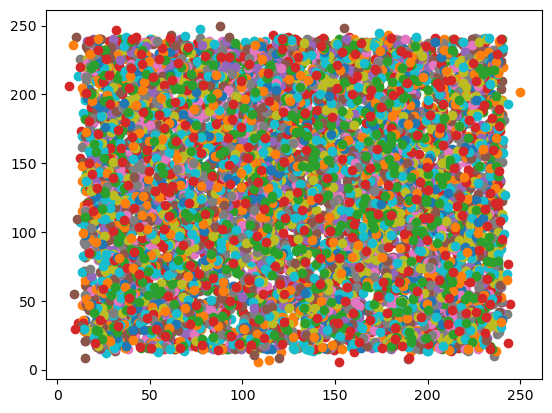

In [8]:
for i in range(6):
    num_crystals = [40, 80, 120, 200, 400, 600, 1200]
    simulations = [CrystalSTEMSimulation(Al_Structure, real_space_pixels=256, num_crystals=i) for i in num_crystals]
    with open("recall_crystals"+str(i)+".txt","w+") as f:
        f.write("num_crystals, perfect_recall, partial_recall \n")
        from skimage.draw import disk
        mask = np.ones((64,64), dtype=bool)
        rr,cc = disk((32,32), 10)
        mask[rr,cc]=False
        for s, num_crystal in zip(simulations,num_crystals):
            arr = s.make_4d_nano(num_electrons=10)
            ground_truth_vectors = s.vectors
            signal = hs.signals.Signal2D(arr)
            signal.set_signal_type("electron_diffraction")
            signal = signal.as_lazy()
            signal.rechunk((32,32))

            filtered = signal.filter(gaussian_filter, 
                         sigma=(1,1,0,0))
            template = filtered.template_match_disk(disk_r=5,
                                        subtract_min=False,
                                            show_progressbar=False)
            template.data[:,:,:, 0:5]=0
            template.data[:,:,:,-5:]=0
            template.data[:,:, 0:5, :]=0
            template.data[:,:,-5:, :]=0
            pks = template.find_peaks(threshold_abs=0.5,
                          interactive=False,
                          show_progressbar=False )
            vect = DiffractionVectors.from_peaks(pks,
                                     center= (32, 32),
                                     calibration=(1/32,1/32))
            vect.compute()
            filt = vect.filter_magnitude(.05,.85,show_progressbar=False )

            flat = filt.flatten_diffraction_vectors()
            signal.axes_manager.signal_axes[0].offset=-1
            signal.axes_manager.signal_axes[1].offset=-1
            signal.axes_manager.signal_axes[1].scale=1/32
            signal.axes_manager.signal_axes[0].scale=1/32
            
            flat = filt.flatten_diffraction_vectors()
            cords = s.get_coords(low=0.1, high=0.8)
            filtered_centers = s.centers[[len(c)>1 for c in cords]]
            lab = flat.cluster(DBSCAN(eps=1,min_samples=2 ), columns=[0,1,2,3],
                               column_scale_factors=[2,2,0.05,0.05])
            
            clust = lab.cluster_labeled_vectors(DBSCAN(eps=5, min_samples=2))            
            
            # Find the mean position in real space
            means = clust.map_vectors(column_mean,columns=[0, 1,],
                          label_index=-1,
                          dtype=float,
                          shape=(2,))
            
            # Find all of the Diffraction Vectors identified
            center_means = clust.map_vectors(get_vector_centers, dtype=object)
            
            # Get the coordinates for the all of the centers in real space and the coordinates in
            # reciporical space
            filtered_coords = s.get_coords(.1,0.8)
            filtered_centers = [cen for cen, c in zip(s.centers, filtered_coords) if len(c)>1]
            filtered_coords = [c for c in filtered_coords if len(c)>1]

            mean_tree= KDTree(means)
            # testing recall percentage
            in_range = [m for m in mean_tree.query_ball_point(filtered_centers, r=4)]

            recall_percents =[]
            for ground_truth, ind in zip(filtered_coords, in_range):
                gt_tree = KDTree(ground_truth[:,:2])
                recall_percent = []
                for i in ind:
                    inside = np.sum([len(r)>0 for r in gt_tree.query_ball_point(center_means[i][:,:2], r=0.1)])
                    recall_percent.append(inside/len(ground_truth))

                if len(recall_percent)==0:
                    recall_percents.append(np.nan)
                else:
                    recall_percents.append(np.max(recall_percent))
            unique, counts = np.unique(recall_percents, return_counts=True)
            
            filtered_centers = np.array(filtered_centers)
            plt.scatter(filtered_centers[:,0],filtered_centers[:,1])
            plt.scatter(means[:,0],means[:,1])
            print(unique, counts)
            perfect_recall_percent = np.sum(counts[unique>=1])/np.sum(counts)
            print("Perfect Recall", perfect_recall_percent)
            partial_recall_percent = np.sum(counts[unique>0])/np.sum(counts)
            print("Partial Recall", partial_recall_percent)
            f.write(str(num_crystal)+", " + str(perfect_recall_percent)+", "+ str(partial_recall_percent)+"\n")

## 2.1 Plotting Nanocrystals with Increasing Overlaps

In [11]:
num_crystals = [500, 1000,1500, 2000, 3000 ]
simulations = [CrystalSTEMSimulation(Al_Structure, real_space_pixels=256, num_crystals=i) for i in num_crystals]

/Users/carterfrancis/mambaforge/envs/pyxem-dev/lib/python3.11/site-packages/diffsims/generators/sphere_mesh_generators.py:523: RuntimeWarning: invalid value encountered in divide
  phi2 = sign * np.nan_to_num(np.arccos(x_comp / norm_proj))


In [12]:
sym_recall = [np.loadtxt("recall_sym_crystals"+str(i)+".txt", delimiter=",", skiprows=1) for i in range(6)]
mean_sym_recall = np.mean(sym_recall, axis=0)
std_sym_recall = np.std(sym_recall, axis=0)

FileNotFoundError: recall_sym_crystals0.txt not found.

In [ ]:
simulations[0].vectors[:,2:4]

In [ ]:
[np.sum(unwrap(s.vectors[:,2:])[:,0]>0.4 * (unwrap(s.vectors[:,2:])[:,0]<0.5))/(256*256) for s in simulations]

In [ ]:
fig = plt.figure(figsize=(5,5))

axs = fig.add_axes((.15,.15, 0.8,0.7))
axs.errorbar(mean_sym_recall[:,0],
             mean_sym_recall[:,1]*100,
             std_sym_recall[:,1]*100,
             capsize=2, color="black",ls="none",
             marker="o", markersize=5,)


axs.set_xlabel("Number of Crystals")
axs.set_ylabel("Recall Percentage")
axs.set_ylim(-4,104)

axs2 = fig.add_axes((.2,.2, 0.2,0.2))

axs3 = fig.add_axes((.45,.2, 0.2,0.2))

axs4 = fig.add_axes((.7,.2, 0.2,0.2))

for ax in [axs2,axs3,axs4]:
    ax.set_xticks([])
    ax.set_yticks([])

simulations[0].plot_real_space(ax=axs2, alpha=0.05)
simulations[0].plot_real_space(ax=axs2, remove_non_symmetric=True, alpha=0.5)
simulations[2].plot_real_space(ax=axs3, alpha=0.05)
simulations[2].plot_real_space(ax=axs3, remove_non_symmetric=True, alpha=0.5)
simulations[-1].plot_real_space(ax=axs4, alpha=0.05)
simulations[-1].plot_real_space(ax=axs4, remove_non_symmetric=True, alpha=0.5)
corners = [.2,.45,.7]

for a, i,c in zip([axs2, axs3, axs4], [0,2,-1], corners):
    axs.annotate("", xy=(num_crystals[i],-4.5), xytext=(c, .16), xycoords="data",
                 textcoords="figure fraction",
                 arrowprops=dict(facecolor='black',arrowstyle="-", lw=1.5),annotation_clip=False)
    axs.annotate("", xy=(num_crystals[i],-4.5), xytext=(c+0.18, .16), xycoords="data",
                 textcoords="figure fraction",
                 arrowprops=dict(facecolor='black',arrowstyle="-", lw=1.5),annotation_clip=False)
    
fig.savefig("Figures/Figure7-RecallOfSymmetricCrystals.png",bbox_inches="tight" )
plt.show()